A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/week9/day2/data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### 1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?



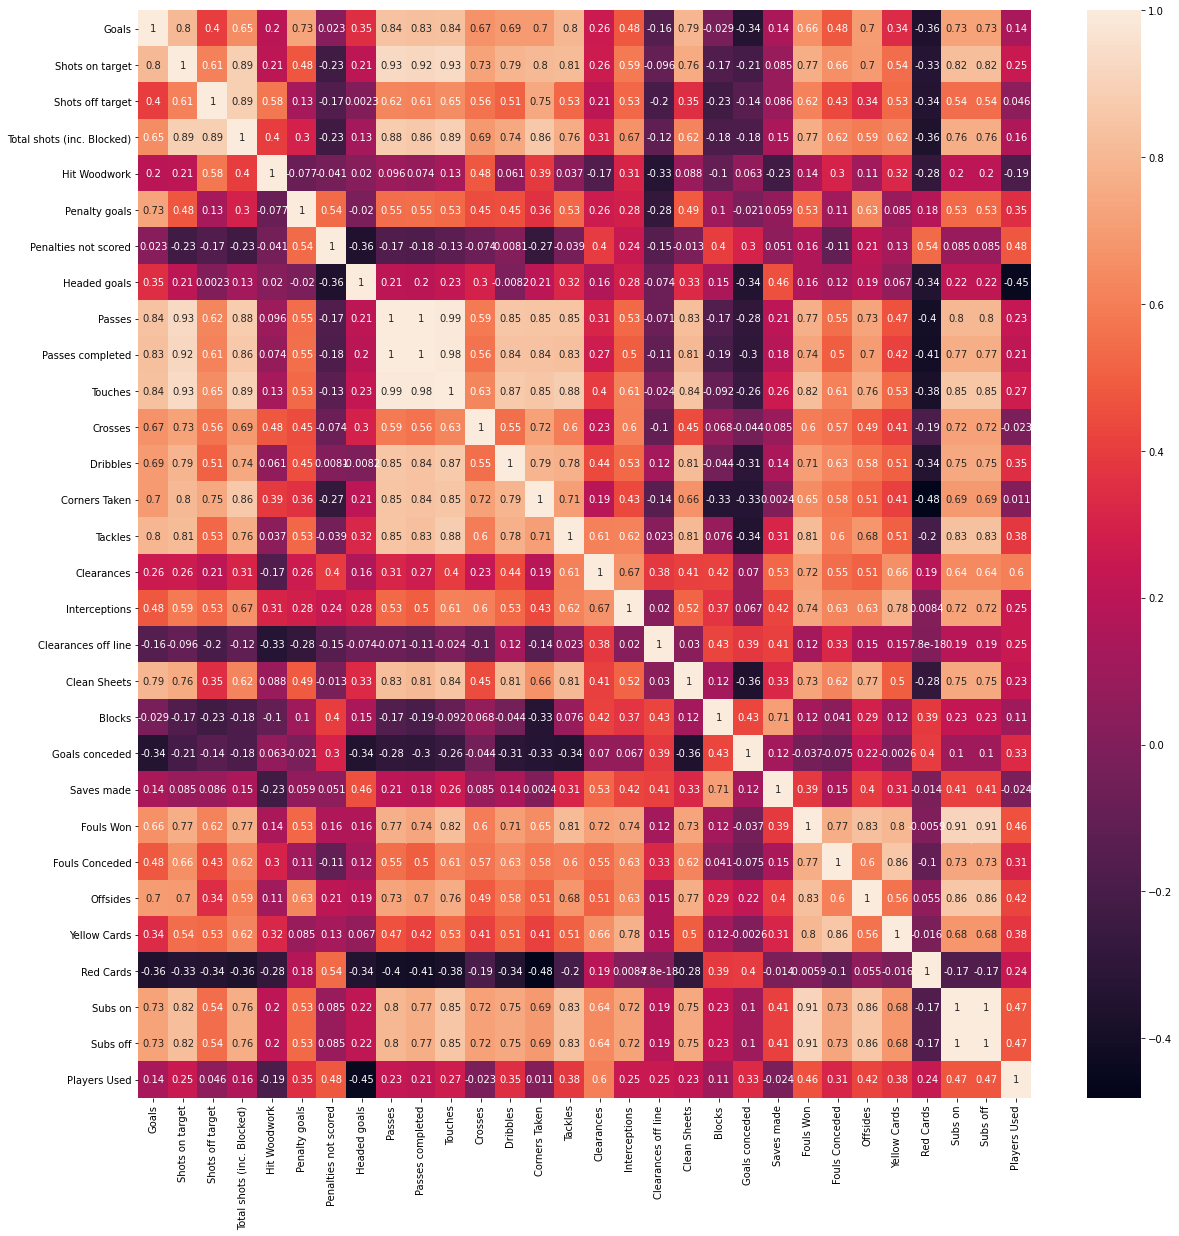

In [7]:
# Matriz de correlación, en este caso sólo es de las columnas numéricas
plt.figure(figsize=(20,20))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### 2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?



In [3]:
# Para comprobar si existe una relación tenemos que cambiar los datos a integer ya que estan en string. Lo primero es eliminar el símbolo %
# Aplicamos esta función:
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())

In [4]:
df["% Goals-to-shots"] =df["% Goals-to-shots"].map(dejar_solo_cifras).astype(int)
df["Shooting Accuracy"] =df["Shooting Accuracy"].map(dejar_solo_cifras).astype(int)
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,519,160,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,419,129,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,500,200,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,500,172,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,379,65,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,478,156,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,307,192,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,430,75,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,250,41,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,394,52,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


<AxesSubplot:>

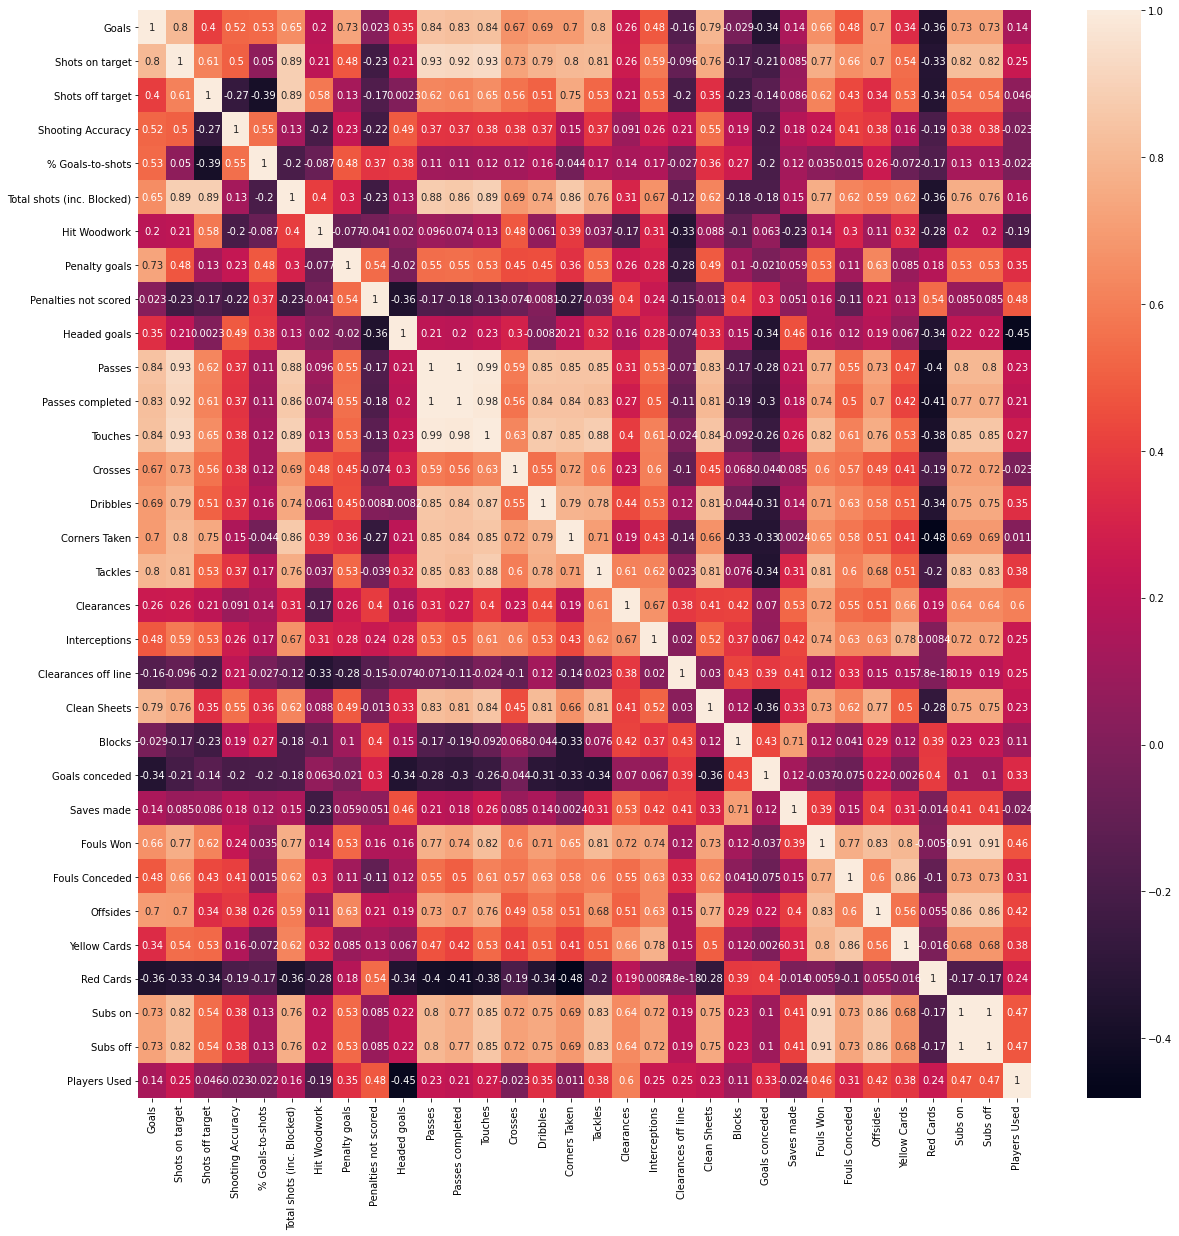

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [61]:
# Aunque lo podemos ver de manera visual. Muestro en código el dato de la correlación entre goal y % Goals-to-shots
df['Shooting Accuracy'].corr(df['Goals'])

0.5212095324544346

#### Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos.

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR

In [6]:
# Obtenemos X e y para nuestro modelo
X = df[['Shooting Accuracy']].values
y = df['Goals'].values

In [64]:
X.shape

(16, 1)

In [65]:
y.shape

(16,)

In [7]:
# Dividimos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
scores_models = []
model_name = ["LinearRegression","Polynomial Regression", "svm.SVR"]

score linear regression:  -0.07520432681971112


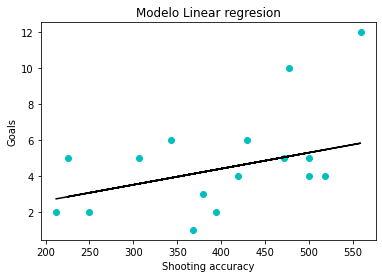

In [40]:
# Linear regresion

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("score linear regression: ", score)

plt.scatter(X, y, color='c')
y_pred = model.predict(X)
plt.plot(X,y_pred , color='k')
plt.title("Modelo Linear regresion")
plt.ylabel("Goals")
plt.xlabel("Shooting accuracy")
plt.show()
scores1 = scores_models.append(score)

X_poly  (12, 4)
y_pred (12,)
Score Polinomial regression:  0.16523269363680448


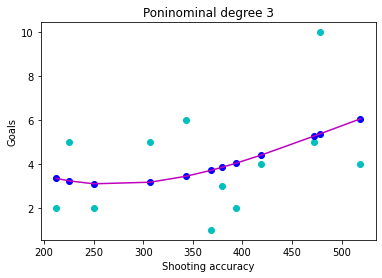

In [41]:
# Regresión no Lineal con polinomio
degree = 3

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print("X_poly ", X_poly.shape)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score Polinomial regression: ", r2_score(y_train, y_pred))  # <-- dudo a la hora de sacar el score si está bien!!!!

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='c')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='m')
plt.scatter(X_train_to_show, y_pred, color='b')
plt.ylabel("Goals")
plt.xlabel("Shooting accuracy")
plt.title("Poninominal degree " + str(degree))
plt.show()
scores2 = scores_models.append(r2_score(y_train, y_pred))

Score SVR:  -0.07520432681971112


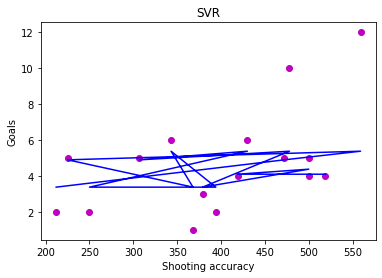

In [42]:
regressor = SVR(kernel='rbf', gamma="auto") # utilizo el kernel rbf porque el resto tarda mucho tiempo en ejecutar
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X)

score = model.score(X_test, y_test)
print("Score SVR: ",score)


plt.scatter (X, y, color = 'm') 
plt.plot (X, y_pred, color = 'b') 
plt.title ('SVM --> SVR') 
plt .xlabel ("Shooting accuracy") 
plt.ylabel ("Goals") 
plt.title("SVR")
plt.show ()
scores3 = scores_models.append(score)

#### Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [43]:
score_modelos = scores_models.append(model_name)
score_modelos

,score
LinearRegression,-0.075204
Polynomial Regression,0.050209
svm.SVR,-0.075204


In [61]:
coef1 = model.coef_
df1= pd.DataFrame(coef1, [["Linear regression"]], columns=['Coefficient'])
df1

,Coefficient
Linear regression,0.008924


In [ ]:
coef2 = lin_reg_model.coef_
df2 =pd.DataFrame(coef2, [["Polynomial Regression"]], columns=['Coefficient'])
df2

In [65]:
coef3 = model.coef_
df3 =pd.DataFrame(coef3, [[ "svm.SVR"]], columns=['Coefficient'])
df3

,Coefficient
svm.SVR,0.008924


In [67]:
df_coef = df1.append(df2)
df_coef = df_coef.append(df3)
df_coef

,Coefficient
Linear regression,0.008924
Polynomial Regression,0.008924
svm.SVR,0.008924


### 3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

In [116]:
scores_models2 = []
model_name2 = ["Logistic Regression","SVM", "Random forest"]

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


In [117]:
# La columna Goals tratarla como categórica, por lo que aplicamos labelEncoder
le = LabelEncoder()
goals_transformed = le.fit_transform(df["Goals"])

X = df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]].values
y = goals_transformed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [118]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
score = model.score(X_train,y_train)
print("Predición del modelo: ", y_pred.shape)
print("Score Logistic Regresion: ", score)

scores1 = scores_models2.append(score)

Predición del modelo:  (12,)
Score Logistic Regresion:  0.9166666666666666


In [119]:
# SVM -- SVC (Clasificación)
clf = svm.SVC(kernel='rbf', gamma="auto")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
score = clf.score(X_test, y_test)

print("Predición del modelo: ", y_pred.shape)
print("Score SVM -- SVC: ", score)
scores2 = scores_models2.append(score)


Predición del modelo:  (12,)
Score SVM -- SVC:  0.25


In [120]:
# Random forest



# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X, y)
Y_pred = regressor.predict(X_train)
score = regressor.score(X_test, y_test)

print("Predición del modelo: ", y_pred.shape)
print("Score Random forest: ", score)


scores3 = scores_models2.append(score)

Predición del modelo:  (12,)
Score Random forest:  0.9524457142857143


In [ ]:
*** No sé cómo en código marcaria número de goles cada equipo.